In [1]:
import numpy as np
import torch, torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

(20000,)


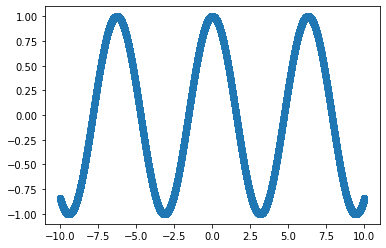

In [13]:
X = np.arange(-1000, 1000, 0.1) / 100
Y = np.cos(X)

print(X.shape)

plt.plot(X, Y, 'o')
plt.show()


In [14]:
def get_train_test_dataset(X, Y):
    indices = np.random.permutation(len(X))
    X, Y = X[indices], Y[indices]
    
    X = torch.from_numpy(X).reshape((-1, 1)).double()
    Y = torch.from_numpy(Y).reshape((-1, 1)).double()
    
    train_length = int(0.8 * len(X))
    X_train, Y_train = X[:train_length], Y[:train_length]
    X_test, Y_test = X[train_length:], Y[train_length:]

    train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=100)
    test_loader = DataLoader(TensorDataset(X_test, Y_test), batch_size=100)

    return train_loader, test_loader

train_loader, test_loader = get_train_test_dataset(X, Y)


In [22]:
class LinearModel(nn.Module):
    def __init__(self) -> None:
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x):
        x =  nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        return self.fc3(x)


model = LinearModel().double()
model.forward(torch.tensor([4]).double())

for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[-0.5272],
        [-0.9208],
        [-0.3786],
        [ 0.7548],
        [-0.2278],
        [-0.0722],
        [ 0.4980],
        [ 0.7212],
        [ 0.0820],
        [ 0.4960],
        [ 0.8938],
        [ 0.4673],
        [ 0.5650],
        [-0.4574],
        [ 0.5580],
        [ 0.0110],
        [-0.0511],
        [-0.2910],
        [-0.5034],
        [ 0.8053],
        [ 0.8503],
        [ 0.9928],
        [ 0.6847],
        [ 0.9054],
        [-0.5631],
        [-0.0890],
        [ 0.1920],
        [-0.0975],
        [-0.0861],
        [ 0.6143],
        [ 0.5539],
        [ 0.7472],
        [ 0.1487],
        [ 0.7063],
        [-0.9112],
        [ 0.4893],
        [ 0.1290],
        [-0.9896],
        [-0.7277],
        [-0.1257],
        [ 0.1167],
        [-0.3799],
        [ 0.8364],
        [-0.8836],
        [-0.6320],
        [-0.7985],
        [ 0.2342],
        [-0.3160],
        [ 0.8201],
        [-0.3165],
        [-0.3081]

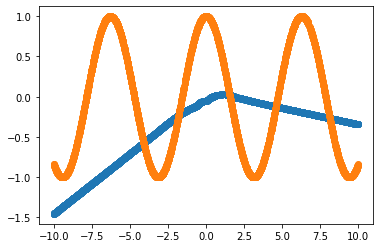

0.7685970689562265


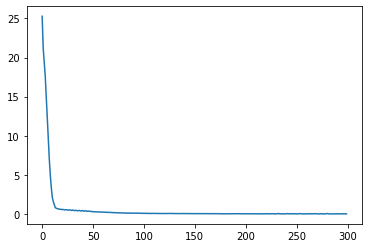

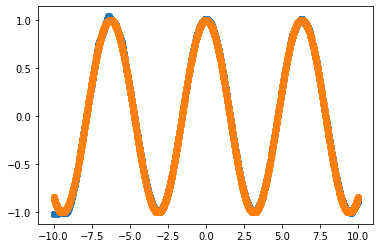

0.00029682363330417146


In [23]:
def train(model, train_loader, optimizer, num_epochs=100):
    running_losses = []
    for epoch in range(num_epochs):
        running_loss = 0
        for i, (X_train, Y_train) in enumerate(train_loader):
            predictions = model.forward(X_train)
            loss = nn.MSELoss()(predictions, Y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 50 == 0 and i > 0:
                running_losses.append(running_loss)
                running_loss = 0

    plt.plot(np.arange(len(running_losses)), running_losses)
    plt.show()

def eval(model, test_loader, visualize=False):
    sum_loss, count_loss = 0, 0
    X_tests, Y_tests, predictionss = [], [], []
    for i, (X_test, Y_test) in enumerate(test_loader):
        predictions = model.forward(X_test)
        loss = nn.MSELoss()(predictions, Y_test)
        sum_loss += loss.item()
        count_loss += 1
        X_tests.extend(X_test)
        Y_tests.extend(Y_test)
        predictionss.extend(predictions.detach().numpy())
    
    if visualize:
        plt.plot(X_tests, predictionss, 'o')
        plt.plot(X_tests, Y_tests, 'o')
        plt.show()


    print(sum_loss / count_loss)

model = LinearModel().double()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
eval(model, test_loader, visualize=True)
train(model, train_loader, optimizer)
eval(model, test_loader, visualize=True)